# Importing necessary packages

In [1]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import matplotlib.image as mpimg
import cv2
import tensorflow as tf
from tensorflow import keras
import os
import random
from PIL import Image

2023-06-20 23:18:07.290513: I tensorflow/core/platform/cpu_feature_guard.cc:193] This TensorFlow binary is optimized with oneAPI Deep Neural Network Library (oneDNN) to use the following CPU instructions in performance-critical operations:  SSE4.1 SSE4.2
To enable them in other operations, rebuild TensorFlow with the appropriate compiler flags.


# Storing locations of test and training data

In [2]:
TRAIN_DIR = '/Users/koushikmukka/Downloads/archive/train'
TEST_DIR = '/Users/koushikmukka/Downloads/archive/test'

IMG_DIM = 32
lst = os.listdir(TRAIN_DIR)
if '.DS_Store' in lst:
    lst.remove('.DS_Store')
LABELS = np.asarray(lst)
print(LABELS)

['REAL' 'FAKE']


# Creating training data set

In [6]:
from keras.utils import image_dataset_from_directory

#returns tf.data.dataset object which might have multiple components,with label_mode =binary because binary classification is used/required
trainDataSet = image_dataset_from_directory(directory = TRAIN_DIR,
                                             label_mode = 'binary',
                                             image_size = (64, 64))

Found 100350 files belonging to 2 classes.


2023-06-20 23:08:59.718087: I tensorflow/core/platform/cpu_feature_guard.cc:193] This TensorFlow binary is optimized with oneAPI Deep Neural Network Library (oneDNN) to use the following CPU instructions in performance-critical operations:  SSE4.1 SSE4.2
To enable them in other operations, rebuild TensorFlow with the appropriate compiler flags.


# Examples of images in given dataset

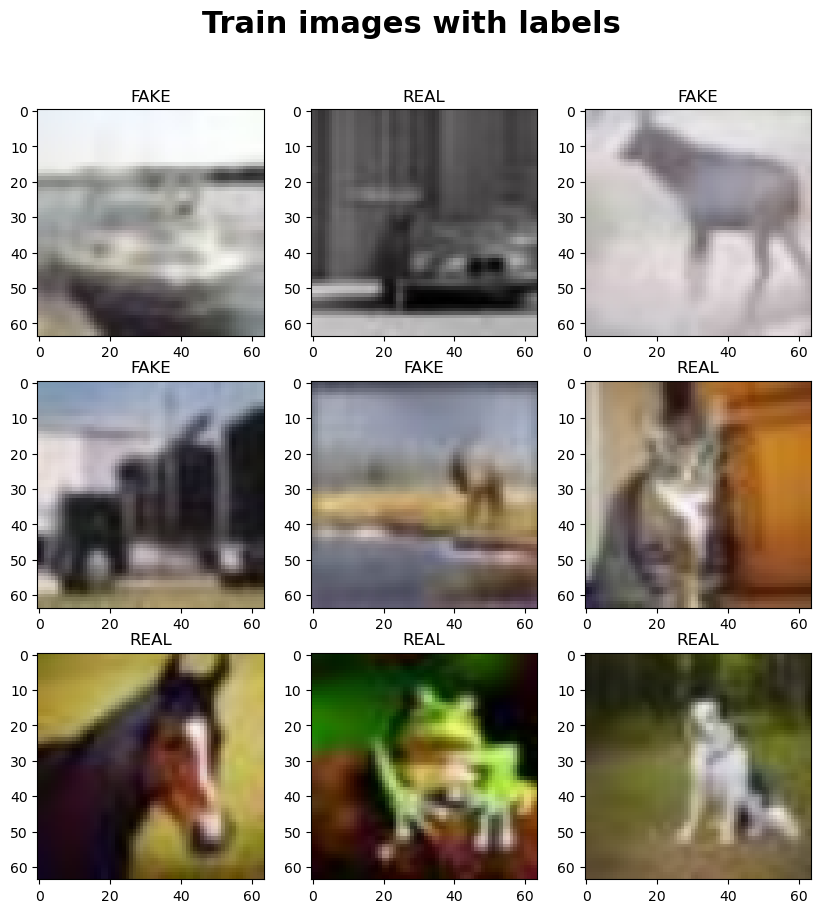

In [7]:
#returns a list of class names in stored dataset
#here real and fake classes inside train
classNames = trainDataSet.class_names

plt.figure(figsize=(10, 10))
plt.suptitle('Train images with labels',
             fontweight = 'bold',
            fontsize = 22)
for images, labels in trainDataSet.take(9):
    for i in range(9):
        ax = plt.subplot(3, 3, i + 1)#.numpy returns np.ndarray
        plt.imshow(images[i].numpy().astype('uint8'))#arrays representing rgb images have uint8 datatype
        labelIndex = int(labels[i]) # gets the index value
        plt.title(LABELS[labelIndex])
plt.show()

# Preprocessing of given images

In [57]:
from keras.preprocessing.image import ImageDataGenerator
#The ImageDataGenerator class allows your model to receive new variations of the images at each epoch
#It is data augmentation
# Data augmentation is a technique of artificially increasing the training set by creating modified copies of a dataset using existing data
#No other image augementation.
TRAIN_IMAGE_GENERATOR = ImageDataGenerator(rescale = 1./255)
TEST_IMAGE_GENERATOR = ImageDataGenerator(rescale = 1./255)


TRAIN_GENERATOR_RGB = TRAIN_IMAGE_GENERATOR.flow_from_directory(
    TRAIN_DIR,
    target_size = (32, 32),
    class_mode = 'binary',
    color_mode = 'rgb' 
)

TEST_GENERATOR_RGB = TEST_IMAGE_GENERATOR.flow_from_directory(
    TEST_DIR,
    target_size = (32, 32),
    class_mode = 'binary',
    color_mode = 'rgb' 
)

#Returns a DirectoryIterator object.

Found 100350 images belonging to 2 classes.
Found 20000 images belonging to 2 classes.


# Building model

In [16]:
from keras.models import Sequential
from keras.layers import Dense, Conv2D, MaxPooling2D, AveragePooling2D, BatchNormalization, Flatten,Dropout
from keras.layers.activation import *
from keras.applications.vgg16 import VGG16, preprocess_input
from keras.models import Model
from keras.callbacks import ModelCheckpoint, EarlyStopping
from keras.optimizers import *
from keras.metrics import BinaryAccuracy
from keras.losses import BinaryCrossentropy
from tensorflow.keras.applications import convnext

In [23]:
EPOCHS = 30
m4 = Sequential([
    Conv2D(input_shape = [32, 32, 3],
           filters = 8,
           kernel_size = (5, 5),
           padding = 'same',
           kernel_initializer = 'he_normal'
          ),
    ReLU(),
    Conv2D(filters = 8,
           kernel_size = (3, 3),
           padding = 'same',
           kernel_initializer = 'he_normal'
          ),
    ReLU(),
    Flatten(),
    Dense(units = 4, kernel_initializer = 'he_normal'),
    ReLU(),
    Dense(units = 1, activation = 'sigmoid'),
])

m4.compile(loss = 'binary_crossentropy',
           optimizer = 'adam',
           metrics = ['accuracy']
          )

In [24]:
m4_history = m4.fit(TRAIN_GENERATOR_RGB,
                    epochs = EPOCHS,
                    validation_data = TEST_GENERATOR_RGB,
                   )

Epoch 1/30
3136/3136 [==============================] - 82s 26ms/step - loss: 0.6932 - accuracy: 0.4970 - val_loss: 0.6931 - val_accuracy: 0.5000
Epoch 2/30
3136/3136 [==============================] - 89s 28ms/step - loss: 0.6932 - accuracy: 0.4999 - val_loss: 0.6932 - val_accuracy: 0.5000
Epoch 3/30
3136/3136 [==============================] - 99s 32ms/step - loss: 0.6932 - accuracy: 0.4995 - val_loss: 0.6932 - val_accuracy: 0.5000
Epoch 4/30
3136/3136 [==============================] - 92s 29ms/step - loss: 0.6932 - accuracy: 0.4988 - val_loss: 0.6932 - val_accuracy: 0.5000
Epoch 5/30
3136/3136 [==============================] - 91s 29ms/step - loss: 0.6932 - accuracy: 0.5009 - val_loss: 0.6931 - val_accuracy: 0.5001
Epoch 6/30
3136/3136 [==============================] - 94s 30ms/step - loss: 0.6932 - accuracy: 0.4993 - val_loss: 0.6933 - val_accuracy: 0.5000
Epoch 7/30
3136/3136 [==============================] - 97s 31ms/step - loss: 0.6932 - accuracy: 0.4992 - val_loss: 0.6931 -

In [26]:
model=Sequential()
model.add(Conv2D(32,(3,3),activation='relu',input_shape=(32,32,3)))
model.add(MaxPooling2D((2,2)))

model.add(Conv2D(32,(3,3),activation='relu'))
model.add(MaxPooling2D((2,2)))

model.add(Flatten())
model.add(Dense(64,activation='relu'))
model.add(Dense(1,activation='sigmoid'))

In [30]:
model.compile(loss='binary_crossentropy',optimizer='adam',metrics=['accuracy'])

In [47]:
model.summary()

Model: "sequential_6"
_________________________________________________________________
 Layer (type)                Output Shape              Param #   
 conv2d_12 (Conv2D)          (None, 30, 30, 32)        896       
                                                                 
 max_pooling2d_2 (MaxPooling  (None, 15, 15, 32)       0         
 2D)                                                             
                                                                 
 conv2d_13 (Conv2D)          (None, 13, 13, 32)        9248      
                                                                 
 max_pooling2d_3 (MaxPooling  (None, 6, 6, 32)         0         
 2D)                                                             
                                                                 
 flatten_6 (Flatten)         (None, 1152)              0         
                                                                 
 dense_12 (Dense)            (None, 64)               

In [31]:
model.fit(TRAIN_GENERATOR_RGB,
                    epochs = 1,
                    validation_data = TEST_GENERATOR_RGB,
                    batch_size = 64
                   )

3136/3136 [==============================] - 82s 26ms/step - loss: 0.3563 - accuracy: 0.8427 - val_loss: 0.2477 - val_accuracy: 0.9011


In [32]:
opt=keras.optimizers.SGD(learning_rate=0.001)
model.compile(loss='binary_crossentropy',optimizer=opt,metrics=['accuracy'])

In [60]:
model_history=model.fit(TRAIN_GENERATOR_RGB,
                    epochs = 30,
                    validation_data = TEST_GENERATOR_RGB,
                    batch_size = 64
                   )

Epoch 1/30
3136/3136 [==============================] - 80s 26ms/step - loss: 0.2062 - accuracy: 0.9181 - val_loss: 0.2062 - val_accuracy: 0.9169
Epoch 2/30
3136/3136 [==============================] - 86s 27ms/step - loss: 0.2048 - accuracy: 0.9181 - val_loss: 0.2137 - val_accuracy: 0.9150
Epoch 3/30
3136/3136 [==============================] - 91s 29ms/step - loss: 0.2037 - accuracy: 0.9188 - val_loss: 0.2172 - val_accuracy: 0.9139
Epoch 4/30
3136/3136 [==============================] - 90s 29ms/step - loss: 0.2022 - accuracy: 0.9192 - val_loss: 0.2117 - val_accuracy: 0.9141
Epoch 5/30
3136/3136 [==============================] - 100s 32ms/step - loss: 0.2012 - accuracy: 0.9194 - val_loss: 0.2029 - val_accuracy: 0.9174
Epoch 6/30
3136/3136 [==============================] - 86s 27ms/step - loss: 0.1999 - accuracy: 0.9206 - val_loss: 0.2036 - val_accuracy: 0.9174
Epoch 7/30
3136/3136 [==============================] - 85s 27ms/step - loss: 0.1986 - accuracy: 0.9204 - val_loss: 0.2069 

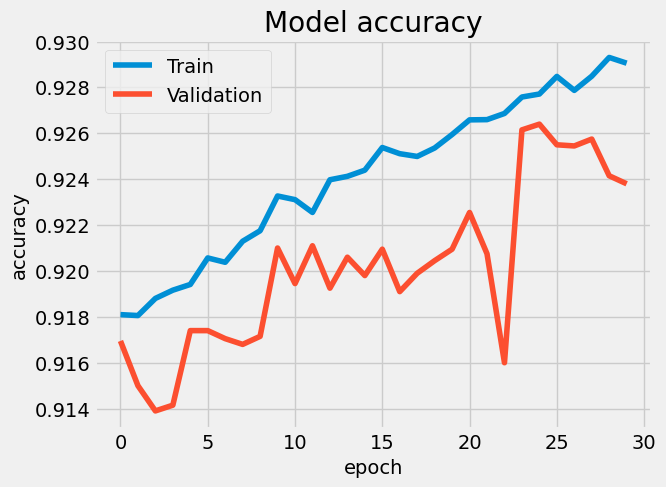

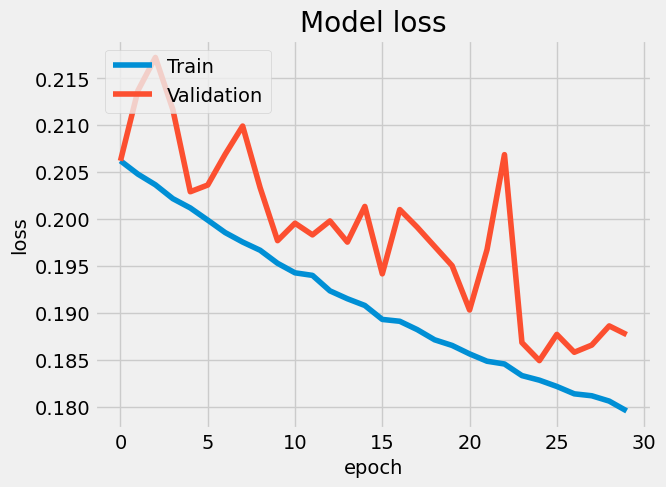

In [63]:
plt.plot(model_history.history['accuracy'])
plt.plot(model_history.history['val_accuracy'])
plt.title('Model accuracy')
plt.ylabel('accuracy')
plt.xlabel('epoch')
plt.legend(['Train', 'Validation'], loc='upper left')
plt.show()
# summarize history for loss
plt.plot(model_history.history['loss'])
plt.plot(model_history.history['val_loss'])
plt.title('Model loss')
plt.ylabel('loss')
plt.xlabel('epoch')
plt.legend(['Train', 'Validation'], loc='upper left')
plt.show()

# Dropout Regularization

In [12]:
model2 = Sequential()
model2.add(Conv2D(32, (3, 3), activation='relu',kernel_initializer='he_uniform', padding='same', input_shape=(32, 32, 3)))
model2.add(MaxPooling2D((2, 2)))
model2.add(Dropout(0.2))
model2.add(Conv2D(32, (3, 3), activation='relu',kernel_initializer='he_uniform', padding='same'))
model2.add(MaxPooling2D((2, 2)))
model2.add(Dropout(0.2))
model2.add(Flatten())
model2.add(Dense(64, activation='relu'))
model2.add(Dropout(0.5))
model2.add(Dense(1, activation='sigmoid'))

In [13]:
opt=keras.optimizers.SGD(learning_rate=0.001)
model2.compile(loss='binary_crossentropy',optimizer=opt,metrics=['accuracy'])

In [46]:
model2.fit(TRAIN_GENERATOR_RGB,
                    epochs = 1,
                    validation_data = TEST_GENERATOR_RGB,
                    batch_size = 64
                   )

3136/3136 [==============================] - 95s 30ms/step - loss: 0.6852 - accuracy: 0.5722 - val_loss: 0.6519 - val_accuracy: 0.6428


In [48]:
model2.summary()

Model: "sequential_10"
_________________________________________________________________
 Layer (type)                Output Shape              Param #   
 conv2d_20 (Conv2D)          (None, 32, 32, 32)        896       
                                                                 
 max_pooling2d_10 (MaxPoolin  (None, 16, 16, 32)       0         
 g2D)                                                            
                                                                 
 dropout_7 (Dropout)         (None, 16, 16, 32)        0         
                                                                 
 conv2d_21 (Conv2D)          (None, 16, 16, 32)        9248      
                                                                 
 max_pooling2d_11 (MaxPoolin  (None, 8, 8, 32)         0         
 g2D)                                                            
                                                                 
 dropout_8 (Dropout)         (None, 8, 8, 32)        

# Transfer learning

In [17]:
def create_model(input_shape, n_classes, optimizer='rmsprop', fine_tune=0):
    """
    Compiles a model integrated with VGG16 pretrained layers
    
    input_shape: tuple - the shape of input images (width, height, channels)
    n_classes: int - number of classes for the output layer
    optimizer: string - instantiated optimizer to use for training. Defaults to 'RMSProp'
    fine_tune: int - The number of pre-trained layers to unfreeze.
                If set to 0, all pretrained layers will freeze during training
    """
    
    # Pretrained convolutional layers are loaded using the Imagenet weights.
    # Include_top is set to False, in order to exclude the model's fully-connected layers.
    conv_base = VGG16(include_top=False,
                     weights='imagenet', 
                     input_shape=input_shape)
    
    # Defines how many layers to freeze during training.
    # Layers in the convolutional base are switched from trainable to non-trainable
    # depending on the size of the fine-tuning parameter.
    if fine_tune > 0:
        for layer in conv_base.layers[:-fine_tune]:
            layer.trainable = False
    else:
        for layer in conv_base.layers:
            layer.trainable = False

    # Create a new 'top' of the model (i.e. fully-connected layers).
    # This is 'bootstrapping' a new top_model onto the pretrained layers.
    top_model = conv_base.output
    top_model = Flatten(name="flatten")(top_model)
    top_model = Dense(4096, activation='relu')(top_model)
    top_model = Dense(1072, activation='relu')(top_model)
    top_model = Dropout(0.2)(top_model)
    output_layer = Dense(1, activation='sigmoid')(top_model)
    
    # Group the convolutional base and new fully-connected layers into a Model object.
    model = Model(inputs=conv_base.input, outputs=output_layer)

    # Compiles the model for training.
    model.compile(optimizer=optimizer, 
                  loss='binary_crossentropy',
                  metrics=['accuracy'])
    
    return model

# without fine tuning

In [18]:
vgg_model = create_model((32,32,3), 1,'adam', fine_tune=0)

In [19]:
vgg_model.fit(TRAIN_GENERATOR_RGB,
                    epochs = 1,
                    validation_data = TEST_GENERATOR_RGB,
                    batch_size = 64
                   )

3136/3136 [==============================] - 1390s 443ms/step - loss: 0.3646 - accuracy: 0.8385 - val_loss: 0.3251 - val_accuracy: 0.8599


In [34]:
vgg_model.compile(optimizer=opt, 
                  loss='binary_crossentropy',
                  metrics=['accuracy'])

In [35]:
vgg_model.fit(TRAIN_GENERATOR_RGB,
                    epochs = 1,
                    validation_data = TEST_GENERATOR_RGB,
                    batch_size = 64
                   )

3136/3136 [==============================] - 1347s 429ms/step - loss: 0.2907 - accuracy: 0.8776 - val_loss: 0.3011 - val_accuracy: 0.8711


In [20]:
vgg_model2 = create_model((32,32,3),1,opt,fine_tune=0)

In [21]:
vgg_model2.fit(TRAIN_GENERATOR_RGB,
                    epochs = 1,
                    validation_data = TEST_GENERATOR_RGB,
                    batch_size = 64
                   )

3136/3136 [==============================] - 1327s 423ms/step - loss: 0.5511 - accuracy: 0.7317 - val_loss: 0.4925 - val_accuracy: 0.7669


In [22]:
def create_model2(input_shape, n_classes, optimizer='rmsprop', fine_tune=0):
    """
    Compiles a model integrated with VGG16 pretrained layers
    
    input_shape: tuple - the shape of input images (width, height, channels)
    n_classes: int - number of classes for the output layer
    optimizer: string - instantiated optimizer to use for training. Defaults to 'RMSProp'
    fine_tune: int - The number of pre-trained layers to unfreeze.
                If set to 0, all pretrained layers will freeze during training
    """
    
    # Pretrained convolutional layers are loaded using the Imagenet weights.
    # Include_top is set to False, in order to exclude the model's fully-connected layers.
    conv_base = VGG16(include_top=False,
                     weights='imagenet', 
                     input_shape=input_shape)
    
    # Defines how many layers to freeze during training.
    # Layers in the convolutional base are switched from trainable to non-trainable
    # depending on the size of the fine-tuning parameter.
    if fine_tune > 0:
        for layer in conv_base.layers[:-fine_tune]:
            layer.trainable = False
    else:
        for layer in conv_base.layers:
            layer.trainable = False

    # Create a new 'top' of the model (i.e. fully-connected layers).
    # This is 'bootstrapping' a new top_model onto the pretrained layers.
    top_model = conv_base.output
    top_model = Flatten(name="flatten")(top_model)
    top_model = Dense(64, activation='relu')(top_model)
    output_layer = Dense(1, activation='sigmoid')(top_model)
    
    # Group the convolutional base and new fully-connected layers into a Model object.
    model = Model(inputs=conv_base.input, outputs=output_layer)

    # Compiles the model for training.
    model.compile(optimizer=optimizer, 
                  loss='binary_crossentropy',
                  metrics=['accuracy'])
    
    return model

In [23]:
vgg_model3 = create_model((32,32,3),1,opt,fine_tune=0)

In [24]:
vgg_model3.fit(TRAIN_GENERATOR_RGB,
                    epochs = 1,
                    validation_data = TEST_GENERATOR_RGB,
                    batch_size = 64
                   )

3136/3136 [==============================] - 1499s 478ms/step - loss: 0.5583 - accuracy: 0.7266 - val_loss: 0.4988 - val_accuracy: 0.7611
